In [26]:
from multi_path_base import *

In [27]:
real_box = real(0.5,0.1)
disct_box = disct(N=100,dt=1,M=1000)
data_box=gen_path_in_box(X0=0.5,disct=disct_box,real=real_box);

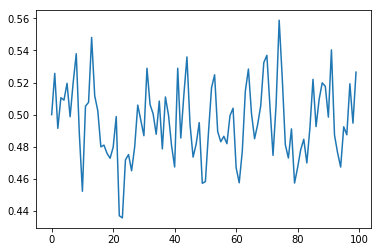

In [28]:
plt.plot(data_box[2])

In [29]:
model_box=model_in_box(disct=disct_box,data=data_box )

In [30]:
model_box.optimize()

array([0.50491941, 0.10016573])

In [57]:
#Increasing number of samples N

real_1 = real(0.5,0.1)

N_test=np.array((10,100,500,1000)) #,5000,10000

#N_test=np.array((10,100,500))

M=100

dt=1

models_N=[]
error_N=np.zeros((len(N_test),2))

for i in range(0,len(N_test)):
        
    disct_temp = disct(N_test[i],dt,M)
        
    X=gen_path_in_box(X0=0.5, disct=disct_temp,real=real_1 )
        
    this_model=model_in_box(disct_temp,X )
    this_model.optimize()
        
    error_N[i]=this_model.get_error(real_1)
    
    del this_model
    #models_N.append(this_model)

In [32]:
#Increasing number of paths M

real_1 = real(0.5,0.1)
N=100
dt=1

M_test=np.array((2,4,10,100,1000)) #,500,10000

models_M=[]
error_M=np.zeros((len(M_test),2))
for j in range(0,len(M_test)):

    disct_temp = disct(N,dt,M_test[j])
        
    X=gen_path_in_box(X0=0.5, disct=disct_temp,real=real_1 )
        
    this_model=model_in_box(disct_temp,X )
    this_model.optimize()
        
    error_M[j]=this_model.get_error(real_1)
    
    del this_model
    #models_M.append(this_model)
    

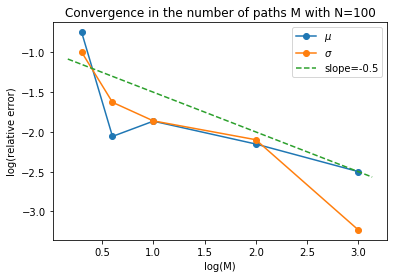

In [43]:
plt.title('Convergence in the number of paths M with N=100')
plt.xlabel('log(M)')
plt.ylabel('log(relative error)')
plt.plot(np.log10(M_test),  np.log10(error_M[:,0]), '-o', label='$\mu$')
plt.plot(np.log10(M_test),  np.log10(error_M[:,1]) ,'-o', label='$\sigma$')
abline(-0.5,-1)
plt.legend()
plt.savefig('conv_M_1_box.pdf')

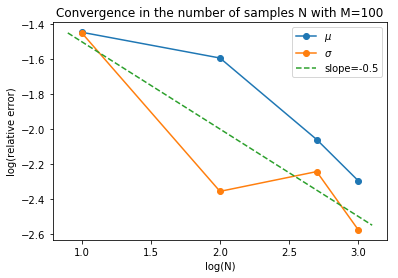

In [58]:
plt.title('Convergence in the number of samples N with M=100')
plt.xlabel('log(N)')
plt.ylabel('log(relative error)')
plt.plot(np.log10(N_test),  np.log10(error_N[:,0]), '-o', label='$\mu$')
plt.plot(np.log10(N_test),  np.log10(error_N[:,1]),'-o' , label='$\sigma$')
abline(-0.5,-1.0)
plt.legend()
plt.savefig('conv_N_box_15.pdf')